## __Project Title__: *Customer Data Pre-Processing* 

### **About the Project:**
A company has provided us with raw data collected from their customers. In this project, we carry out some pre-processing activities to extract valuable information from the provided data in preparation for further analysis. We also carry out visualisation with `seaborn` to gain more insight into the data.
***

## **Part One: Data Processing**

In [1]:
# Import needed libraries for data processing
import csv
import json
import ast as evaluator #python built-in standard library to convert strings to their respective types

***
### <u>**Task 1 & 2**:</u> 
a. Read in data from the CSV file provided by the customer. <br>
b. Convert the flat structure to a nested dictionary.
***

In [2]:
# Customer class to create a new customer object for each row of the csv file
# We can also achieve this using a simple function but I have used a class here 
# to demonstrate Object-Oriented Programming (OOP) in python.

class Customer():
    """
    A class used to represent a Customer
    ...

    Attributes
    ----------
    customer_data : dict
        A dictionary containing key-value pairs of the customer data.
        
    Methods
    -------
    evaluate_expr(self, expr)
        Checks a given value expressed as a string and converts it to its appropriate type.
    
    sort_customer_keys(self, my_dictionary)
        Sorts the keys of the customer dictionary in a predefined order.
    """
    
    def __init__(self, csv_dict_reader_row): # Class constructor takes one row from the csv and transforms it to a customer dictionary
        """
        Parameters
        ----------
        csv_dict_reader_row : csv.DictReader
            An iterable csv.DictReader object to be transformed into a dictionary
        """
        
        #Initialise address, vehicle, and credit card dictionaries
        address = {}
        vehicle = {}
        credit_card = {}
        #Initialise customer dictionary
        customer = {}
        for col_key, col_value in csv_dict_reader_row.items():
            if 'Address' in col_key: #check if the column is an address field
                address[col_key.replace('Address ', '')] = self.evaluate_expr(col_value) # take off 'Address' from column header and add value to the address dictionary
            elif 'Vehicle' in col_key:
                vehicle[col_key.replace('Vehicle ', '')] = self.evaluate_expr(col_value) # take off 'Vehicle' from column header and add value to the address dictionary
            elif 'Credit' in col_key:
                credit_card[col_key.replace('Credit Card ', '')] = self.evaluate_expr(col_value) # take off 'Credit Card' from column header and add value to the address dictionary
            else:
                customer[col_key] = self.evaluate_expr(col_value) #Add value directly to customer dictionary if it doesn't need nesting
        #Add address, vehicle, and credit card dictionaries to customer dictionary
        customer['Address'] = address
        customer['Vehicle'] = vehicle
        customer['Credit Card'] = credit_card
        # sorted_customer = self.sort_customer_keys(customer)
        self.customer_data = customer
            
    def evaluate_expr(self, expr): 
        """
        This function takes a literal string and casts it to its appropriate type.
    
        Parameters:
        - expr (string): The literal string that needs casting.
    
        Returns:
        int, float, bool, or string: The converted value.
        """
        try:
            result = evaluator.literal_eval(expr)
        except:
            return expr
        else:
            return result


    def sort_customer_keys(self, my_dictionary):
        """
        This function sorts a dictionary keys in a given order.
    
        Parameters:
        - my_dictionary (dictionary): The customer dictionary whose keys are to be sorted.
    
        Returns:
        dict: The sorted dictionary.
        """
        #Sort the keys of the dictionary in a given order}
        # Define the desired order of keys
        key_order = ['First Name', 'Last Name','Sex', 'Age (Years)', 'Dependants', 'Marital Status', 'Employer Company', 'Retired',
                     'Yearly Salary (GBP)', 'Yearly Pension (GBP)', 'Distance Commuted to Work (Km)',  'Bank IBAN', 'Address', 'Vehicle', 'Credit Card']

        # Sort customer keys using the defined order
        sorted_keys = sorted(my_dictionary.keys(), key=lambda x: key_order.index(x))
        
        # Create a new customer dictionary with sorted keys
        sorted_cust = {key: my_dictionary[key] for key in sorted_keys}
        return sorted_cust

In [3]:
# Function to take in a customer DictReader object from a csv file
# and convert the flat structure to a list of nested dictionaries using the Customer class

def restructure_customer_data(csv_dict_reader):
    """
    This function takes a csv DictReader object and converts the flat structure to 
    a list of nested dictionaries using the Customer class.

    Parameters:
    - csv_dict_reader (DictReader object): An iterator that produces a dictionary for each row of a csv file.

    Returns:
    list of Customer: A list of customer dictionaries
    """
    ochubas_customers = []
    for row in csv_dict_reader:
            ochubas_customer = Customer(row)
            ochubas_customers.append(ochubas_customer.customer_data)
    return ochubas_customers

In [8]:
# Actual execution for task 1 & 2 using the function and class created in the cells above
# Using a context manager, read in csv file and create the customer list 
file_path = 'acw_user_data.csv' # Specify file path to read from
ochubas_customers = [] #Initilise list to hold our customers
try:
    with open(file_path, 'r') as customer_csv_file:
        customer_csv_reader = csv.DictReader(customer_csv_file) # Read in the data from the csv file using DictReader
        ochubas_customers = restructure_customer_data(customer_csv_reader)    
except FileNotFoundError as file_error:
    print(f'An error occured: {file_error}')
except:
    print(f'Error occurred while reading from {file_path}')
else: 
    # Print the first five entries of customer list to inspect the output
    i = 0 # Initialise i
    for ochubas_customer in ochubas_customers:
        print(ochubas_customer, '\n\n') # Print and add two lines
        i += 1
        if i >= 5: 
            break; # Break after printing the first five

{'Age (Years)': 89, 'Distance Commuted to Work (Km)': 0, 'Employer Company': 'N/A', 'Dependants': 3, 'First Name': 'Kieran', 'Bank IBAN': 'GB62PQKB71416034141571', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': 7257, 'Retired': True, 'Yearly Salary (GBP)': 72838, 'Sex': 'Male', 'Address': {'Street': '70 Lydia isle', 'City': 'Lake Conor', 'Postcode': 'S71 7XZ'}, 'Vehicle': {'Make': 'Hyundai', 'Model': 'Bonneville', 'Year': 2009, 'Type': 'Pickup'}, 'Credit Card': {'Start Date': '08/18', 'Expiry Date': '11/27', 'Number': 676373692463, 'CVV': 875}} 


{'Age (Years)': 46, 'Distance Commuted to Work (Km)': 13.72, 'Employer Company': 'Begum-Williams', 'Dependants': 1, 'First Name': 'Jonathan', 'Bank IBAN': 'GB37UMCO54540228728019', 'Last Name': 'Thomas', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': 0, 'Retired': False, 'Yearly Salary (GBP)': 54016, 'Sex': 'Male', 'Address': {'Street': '00 Wheeler wells', 'City': 'Chapmanto

***
### <u>**Task 3**:</u> 
a. Scan through the customer collection and check for errors ("" or " ") in the dependants field.<br>
b. Replace empty dependants with zeros.<br>
c. Print a list where all such errors take place (I have called it "problematic indices" here)
***

In [6]:
# Initialise a list to contain the problematic indices
problematic_indices = []

# Replace problematic values with zeros and append the indices to the list
for cust_key, ochubas_customer in enumerate(ochubas_customers):
    if ochubas_customer['Dependants'] == '' or ochubas_customer['Dependants'] == ' ':
        ochubas_customer['Dependants'] = 0
        problematic_indices.append(cust_key)

In [7]:
# Print the indices of customers with erroneous values for dependants

print('\033[1m' + 'Problematic rows for dependants: ' + '\033[0m') #The first escape sequence turns on bold format, and the second turns it off.
print(problematic_indices)

print(f'\n\nTotal number of problematic dependant rows is: \033[1m{len(problematic_indices)}\033[0m')

Problematic rows for dependants: 
[21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


Total number of problematic dependant rows is: 19


***
### <u>**Task 4**:</u> 
After correcting the errors in the dependants column of the Write all records to a <b>processed.json</b> file in the JSON data format. This is a list of dictionaries, where each index of the list is a dictionary representing a singular customer.

***

In [8]:
# Write updated customers to a processed.json file using a context manager

with open("processed.json", "w") as processed_customers_file:
    json.dump(ochubas_customers, processed_customers_file)

***
### <u>**Task 5**:</u> 
a. Extract retired customers and employed customers into separate json files. <br>
b. Retired customers should be in the <b>retired.json</b> file. <br>
c. Employed customers should be in the <b>employed.json</b> file.
***

In [9]:
# Create separate lists for retired and employed customers
retired_customers = [customer for customer in ochubas_customers if customer['Retired'] == True]
employed_customers = [customer for customer in ochubas_customers if customer['Employer Company'] != 'N/A']

# Write retired list to the retired.json file
with open('retired.json', 'w') as retired:
    json.dump(retired_customers, retired)

# Write employed list to the employed.json file
with open('employed.json', 'w') as employed:
    json.dump(employed_customers, employed)


print(f'Total number of retired customers is: \033[1m{len(retired_customers)}\033[0m')
print(f'Total number of employed customers is: \033[1m{len(employed_customers)}\033[0m')

Total number of retired customers is: 246
Total number of employed customers is: 754


***
### <u>**Task 6**:</u> 
<b>Extract customers that have more than 10 years between start and end dates.</b> <br>
a. Create a function to check each row from the csv data and flag the row if credit card date difference is above 10 years. <br>
b. Write all flagged customers to a separate file called <b>remove_ccard.json</b>, in the JSON data format
 file.
***

In [10]:
# Function to check the difference between two dates

def check_date_difference(start_date, end_date):
    """
    This function takes two dates (MM/YY) and calculates the difference between them

    Parameters:
    - start_date (string): A date string containing MM/YY
    - end_date (string): A date string containing MM/YY
    
    Returns:
    float: the resultant difference between the two dates
    """
    start_month, start_year = start_date.split('/') # Split the start_date string into start month and start year
    end_month, end_year = end_date.split('/') # Split the end_date string into end month and end year
    year_diff = int(end_year) - int(start_year) # Get the difference between start and end years
    month_diff = int(end_month) - int(start_month) # get the difference between the start and end months
    
    date_diff = float(r"{:.2f}".format(year_diff + month_diff/12)) # Divide the month difference by 12 to get the year equivalent. This expresses the month differnece as a fraction of a year.
    return date_diff

In [11]:
# Function to check whether a customer should be removed based on the 
# difference between start date and expiry date of credit card

def should_remove_customer(customer):
    """
    This function takes a customer and flags it if the date difference between 
    the credit card dates is higher than 10 years

    Parameters:
    - customer (dictionary): A customer dictionary containing key-value pairs of customer data
    
    Returns:
    bool: a boolean value indicating whether a customer should be removed
    """
    ccard_start_date = customer['Credit Card']['Start Date'] # Get the credit card start date from the customer
    ccard_expiry_date = customer['Credit Card']['Expiry Date'] # Get the credit card expiry date from the customer
    
    date_diff = check_date_difference(ccard_start_date, ccard_expiry_date) # Use the check_date_difference function to get the differnce in dates 
    
    if date_diff > 10: #If the date difference is greater than 10, customer flag should be set to true, else set to false.
        return True
    return False

In [12]:
# Create a list of customers that should be removed based on their credit card date difference

remove_ccard = [customer for customer in ochubas_customers if should_remove_customer(customer)]

# Write removed customers to a json file

with open('remove_ccard.json', 'w') as remove_ccard_file:
    json.dump(remove_ccard, remove_ccard_file)

print(f'Total number of customers with credit card date difference over 10 years is: \033[1m{len(remove_ccard)}\033[0m')

Total number of customers with credit card date difference over 10 years is: 252


***
### <u>**Task 7**:</u> 
Add a new data attribute called “Salary-Commute” to each customer from the <b>processed.json</b> file.<br> 
<b>a.</b> The Salary-Commute is the salary that a customer earns per kilometre (km) of their commute.<br>
    If a person travels 1 or fewer commute Km, then their Salary-Commute would be just their salary.<br>
<b>b.</b> Sort customers by Salary-Commute in ascending order.<br>
<b>c.</b> Export sorted customers to a <b>commute.json</b> file.
***

In [13]:
# Read processed customers from json file into a list

processed_customers = []
with open('processed.json') as processed_file:
    processed_customers = json.load(processed_file)
    
print(processed_customers[1]) # Inspect random customer before appending the 'Salary-Commute' property

{'Age (Years)': 46, 'Distance Commuted to Work (Km)': 13.72, 'Employer Company': 'Begum-Williams', 'Dependants': 1, 'First Name': 'Jonathan', 'Bank IBAN': 'GB37UMCO54540228728019', 'Last Name': 'Thomas', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': 0, 'Retired': False, 'Yearly Salary (GBP)': 54016, 'Sex': 'Male', 'Address': {'Street': '00 Wheeler wells', 'City': 'Chapmanton', 'Postcode': 'L2 7BT'}, 'Vehicle': {'Make': 'Nissan', 'Model': 'ATS', 'Year': 1996, 'Type': 'Coupe'}, 'Credit Card': {'Start Date': '08/12', 'Expiry Date': '11/26', 'Number': 4529436854129855, 'CVV': 583}}


In [14]:
# Exercise 7a

# Function to add 'Salary-Commute' property to a customer
def add_salary_commute_property(customer):
    commute_distance = customer['Distance Commuted to Work (Km)']
    salary = customer['Yearly Salary (GBP)']
    if commute_distance <= 1:
        customer['Salary-Commute'] = salary
    else:
        customer['Salary-Commute'] = round(salary/commute_distance, 2)

# Use the function above to add salary commute to all the customers that we read from the 'processed.json' file
for customer in processed_customers:
    add_salary_commute_property(customer)

print(processed_customers[1]) # Inspect same customer after appending the 'Salary-Commute' property

{'Age (Years)': 46, 'Distance Commuted to Work (Km)': 13.72, 'Employer Company': 'Begum-Williams', 'Dependants': 1, 'First Name': 'Jonathan', 'Bank IBAN': 'GB37UMCO54540228728019', 'Last Name': 'Thomas', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': 0, 'Retired': False, 'Yearly Salary (GBP)': 54016, 'Sex': 'Male', 'Address': {'Street': '00 Wheeler wells', 'City': 'Chapmanton', 'Postcode': 'L2 7BT'}, 'Vehicle': {'Make': 'Nissan', 'Model': 'ATS', 'Year': 1996, 'Type': 'Coupe'}, 'Credit Card': {'Start Date': '08/12', 'Expiry Date': '11/26', 'Number': 4529436854129855, 'CVV': 583}, 'Salary-Commute': 3937.03}


In [15]:
# Using a lambda expression, sort the customers based on the Salary-Commute property.
processed_customers.sort(key=lambda customer: customer['Salary-Commute'])

# Write the updated customers to a new file called 'commute.json'
with open("commute.json", "w") as commute_file:
    json.dump(processed_customers, commute_file)

## **Part Two: Data Visualisation**

In [16]:
# Import needed libraries for data visualisation

import pandas as pd
import seaborn as sns

In [17]:
user_data = pd.read_csv('acw_user_data.csv') #Read in the data from the csv file into a pandas Dataframe.
user_data # Inspect the content of the pandas Dataframe

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (Km),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Studio 6 Heather prairie,North Amelia,E9 0HB,48,18.44,Phillips-Pope,04/19,08/26,3563802099155576,908,...,Clark,married or civil partner,0,False,84645,Male,Saturn,Convertible,2015,Van/Minivan
996,Flat 3 Davies run,Greenshire,E7 4UJ,22,19.61,Hughes LLC,05/12,07/28,3591311819315276,675,...,Jones,married or civil partner,0,False,93314,Female,Toyota,Yukon,2015,Van/Minivan
997,Flat 7 Barber motorway,Burrowsshire,L62 8TA,38,6.66,Bailey Group,01/13,05/29,3584931475767707,679,...,Walker,single,0,False,20940,Female,Ford,S6,2020,Sedan
998,00 Tony forks,Abbiebury,NP4 1JL,45,18.13,Foster-Price,04/19,05/23,4090311300716168,775,...,Thomson,married or civil partner,0,False,82412,Male,Scion,Ram 1500 Quad Cab,2015,Pickup


***
### <u>**Task 1**:</u> 
Obtain the Data Series for Salary, and Age, and calculate the following:<br>
a. Mean Salary<br>
b. Median Age
***

In [18]:
salaries_ds = user_data['Yearly Salary (GBP)'] # Extract the salary column of the dataframe as a data series
ages_ds = user_data['Age (Years)'] # Extract the age column of the dataframe as a data series

In [19]:
mean_salary = salaries_ds.mean() # Task 1a - Obtain the mean salary
median_age = ages_ds.median() # Task 1b - Obtain the median age

# Print values
print("The mean salary is: \033[1m", mean_salary, "\033[0m")
print("The median age is: \033[1m", median_age, "\033[0m")

The mean salary is:  57814.078 
The median age is:  54.0 


***
### <u>**Task 2**:</u> 
Perform univariate plots of the following data attributes:<br>
a. Age, calculating how many bins would be required for a bin_width of 5. <br> 
b. Dependents, fixing data errors with seaborn itself.<br>
c. Age (of default bins), conditioned on Marital Status.
***

In [20]:
# Task 2a
# Calculate the number of bins required for a bin width of 5

bin_width = 5
number_of_bins = round((max(ages_ds) - min(ages_ds))/bin_width)
print("Number of bins for a bin width of 5 is: \033[1m", number_of_bins, "\033[0m" )

Number of bins for a bin width of 5 is:  15 


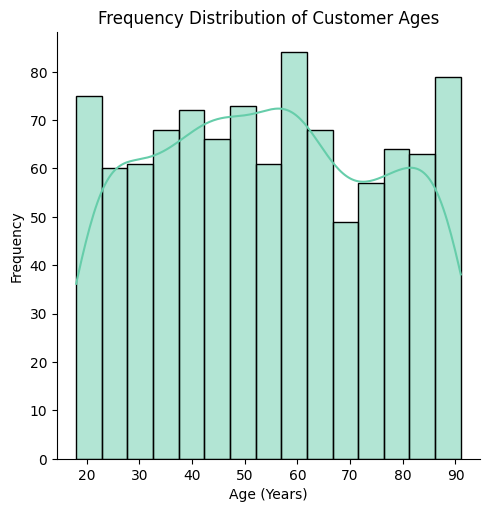

In [21]:
# Univariate plot of customer ages with bin-width of 5;
age_plot_handle = sns.displot(ages_ds, binwidth = 5, color = '#66CDAA', kde=True).set(title = 'Frequency Distribution of Customer Ages') # We assign a handle to it so that we can save the figure later on
age_plot_handle.axes[0, 0].set_ylabel("Frequency"); # Set ylabel for the chart

In [22]:
# Task 2b
# Univariate plot of customer dependants, fixing data errors with seaborn itself;

corrected_dependants = user_data['Dependants'].fillna(0) # Fix error in dependant column by filling it with zeros
zero_dependants = [dep for dep in corrected_dependants if dep == 0] # Get the customers with zero dependants

print(f'Total number of customers with zero dependants is: \033[1m{len(zero_dependants)}\033[0m')

Total number of customers with zero dependants is: 19


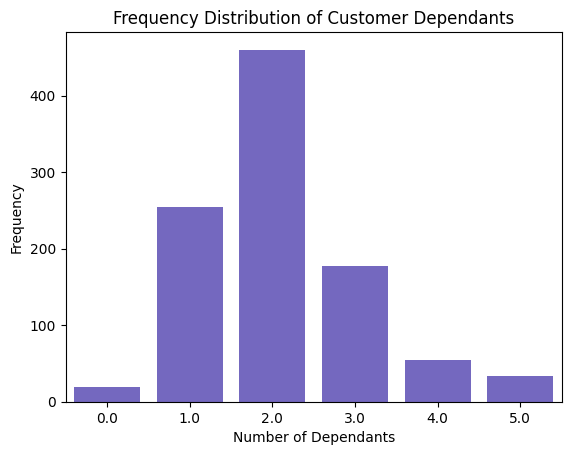

In [23]:
# Exercise 2b
# Univariate plot of customer dependants

dependant_plot_handle = sns.countplot(data = user_data, x = corrected_dependants, color = '#6a5acd')
dependant_plot_handle.set_title('Frequency Distribution of Customer Dependants') # Set chart title
dependant_plot_handle.set_xlabel("Number of Dependants"); # Override the default xlabel for the chart
dependant_plot_handle.set_ylabel("Frequency"); # Override the default ylabel for the chart

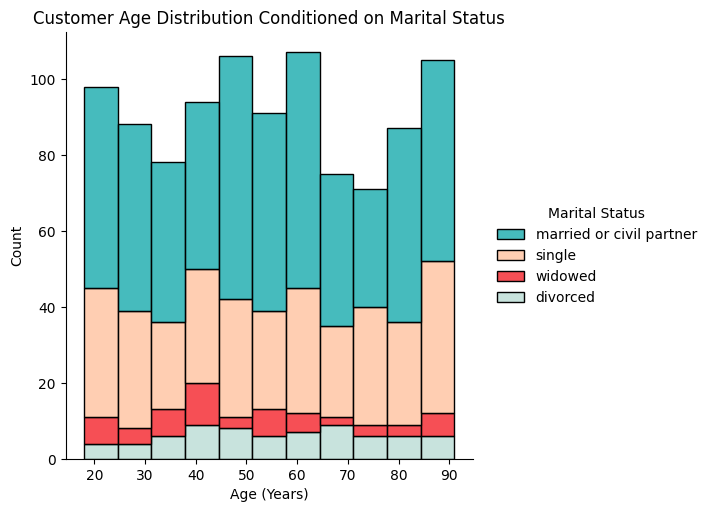

In [24]:
# Task 2c
# Univariate plot of customer ages with default bins conditioned on marital status

colors=["#08a4a7", "#ffbe98", "#f4141c", "#b6dad2"] #Choose preferred colors for various categories of the conditioned attribute
age_plot_cond_handle = sns.displot(data = user_data, x = ages_ds, hue='Marital Status', palette=colors, multiple = 'stack')\
                          .set(title = 'Customer Age Distribution Conditioned on Marital Status') # We set multiple to 'stack' to avoid overlapping colors 

***
### <u>**Task 3**:</u> 
Perform multivariate plots of the following data attributes:<br>
a. Commuted distance against salary <br>
b. Age against Salary <br>
c. Age against Salary conditioned by Dependants
***

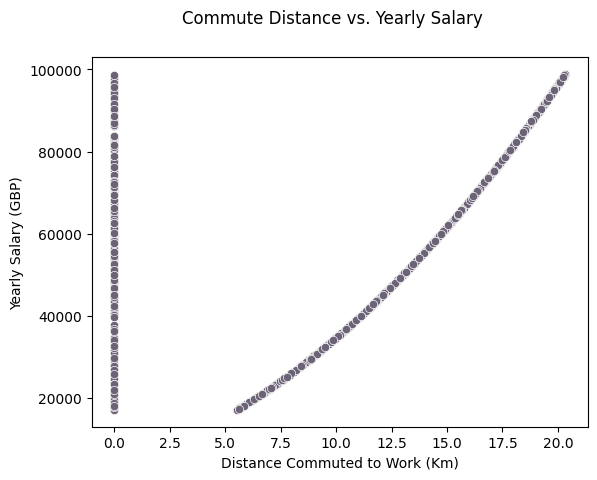

In [25]:
# Exercise 3a
# Multivariate plot of commuted distance against salary

# Using scatter plot
dist_salary_scatter_handle = sns.scatterplot(data = user_data, x = 'Distance Commuted to Work (Km)', y = 'Yearly Salary (GBP)', color = '#6C6377')
dist_salary_scatter_handle.get_figure().suptitle("Commute Distance vs. Yearly Salary");

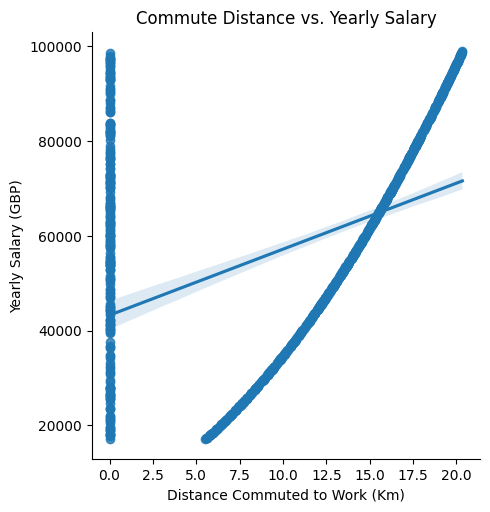

In [26]:
# We plot the same chart using an alternate chart type (lmplot) for comparison
dist_vs_salary_lmplot_handle = sns.lmplot(data = user_data, x = 'Distance Commuted to Work (Km)', y = 'Yearly Salary (GBP)')\
                            .set(title = "Commute Distance vs. Yearly Salary")

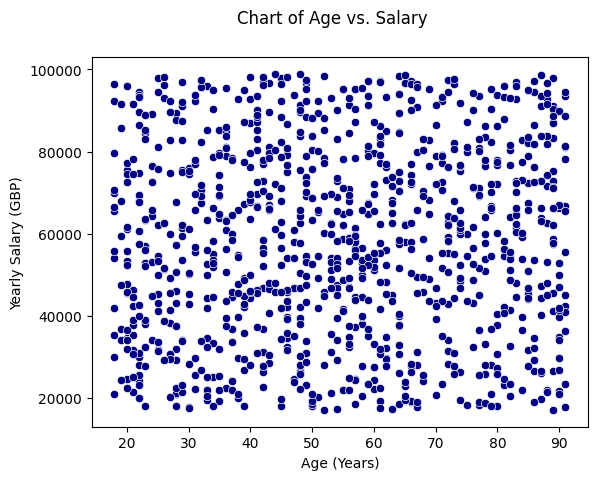

In [27]:
# Multivariate plot of age against salary using scatterplot
age_salary_scatter_handle = sns.scatterplot(data = user_data, x = 'Age (Years)', y = 'Yearly Salary (GBP)', color = '#000080')
age_salary_scatter_handle.get_figure().suptitle("Chart of Age vs. Salary");

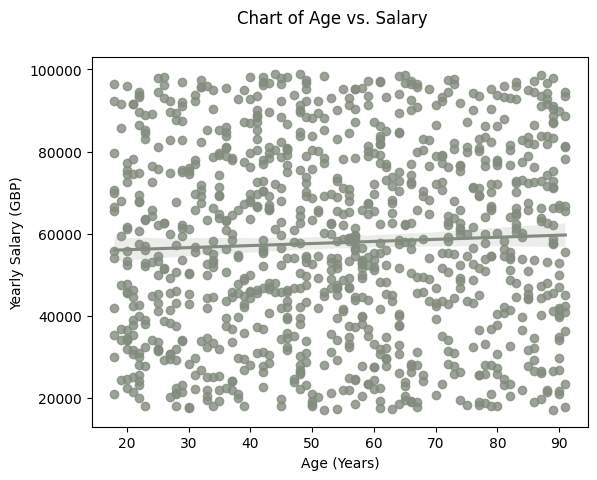

In [28]:
# Exercise 3b
# Multivariate plot of age against salary using regplot which adds a regression line

age_salary_reg_handle = sns.regplot(data = user_data, x = 'Age (Years)', y = 'Yearly Salary (GBP)', color = '#828C7E')
age_salary_reg_handle.get_figure().suptitle("Chart of Age vs. Salary");

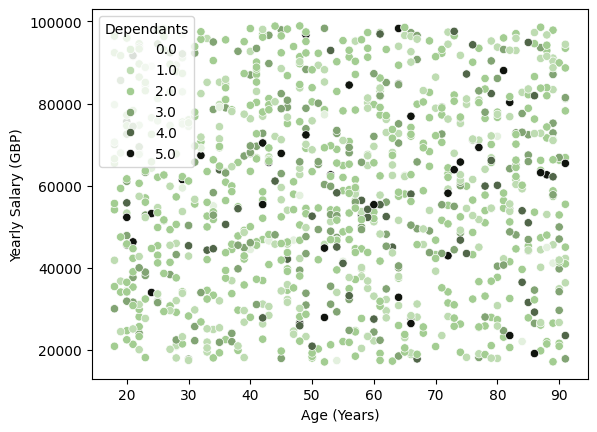

In [29]:
# Exercise 3b
# Multivariate plot of age against salary conditioned on dependants

colors=["#e3f0de", "#bedcb2", "#a3cd92", "#82a474", "#516649", "#10140e"] #Choose preferred colors for various categories of the conditioned attribute
age_salary_cond_handle = sns.scatterplot(data = user_data, x = 'Age (Years)', y = 'Yearly Salary (GBP)', hue= corrected_dependants, palette = colors)

***
### <u>**Task 4**:</u> 
Save all charts
***

In [30]:
charts_to_save = {}
charts_to_save[age_plot_handle] = 'age_plot.png'
charts_to_save[dependant_plot_handle] = 'dependant_plot.png'
charts_to_save[age_plot_cond_handle] = 'age_plot_cond.png'
charts_to_save[dist_salary_scatter_handle] = 'dist_salary_scatter.png'
charts_to_save[dist_vs_salary_lmplot_handle] = 'dist_salary_lm.png'
charts_to_save[age_salary_scatter_handle] = 'age_salary_scatter.png'
charts_to_save[age_salary_reg_handle] = 'age_salary_reg.png'
charts_to_save[age_salary_cond_handle] = 'age_salary_cond.png'


for chart_handle, chart_name in charts_to_save.items():
    chart_handle.figure.savefig(chart_name, bbox_inches='tight')
    print(f'\033[1m{chart_name}\033[0m has been saved to the directory.')

age_plot.png has been saved to the directory.
dependant_plot.png has been saved to the directory.
age_plot_cond.png has been saved to the directory.
dist_salary_scatter.png has been saved to the directory.
dist_salary_lm.png has been saved to the directory.
age_salary_scatter.png has been saved to the directory.
age_salary_reg.png has been saved to the directory.
age_salary_cond.png has been saved to the directory.
